In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from utils import *
from plotting import *

In [13]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)
matchms_scores = append_classes(matchms_scores, 'query')
merged = append_spectrum_metadata(matchms_scores)

In [14]:
matchms_scores_top5 = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_top5_with_0s_only_matching.tsv", sep="\t")
matchms_scores_top5.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores_top5.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)
matchms_scores_top5 = append_classes(matchms_scores_top5, 'query')
merged_top5 = append_spectrum_metadata(matchms_scores_top5)

In [15]:
merged_top5['matches'].value_counts()

matches
2    113
1    100
3     82
0     71
4     11
5      2
Name: count, dtype: int64

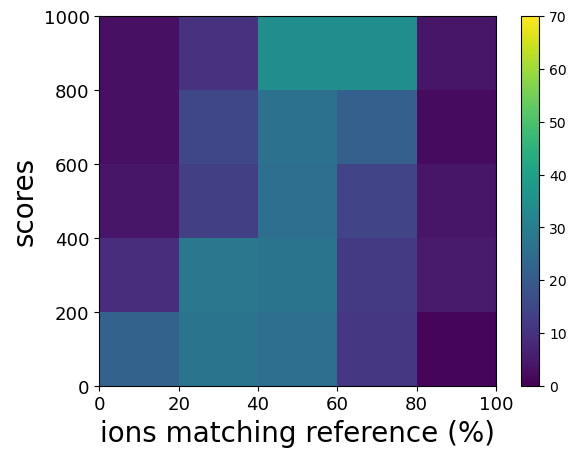

In [16]:
plt.hist2d(matches_normalized * 100, merged['scores'] * 1000, bins=(5, 5), range=[[0, 100], [0, 1000]])
plt.colorbar()
plt.clim(0, 70)
plt.xlabel('ions matching reference (%)', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

# plot name in the manuscript:
# "histograms/20240223_2d_histogram_all.png"

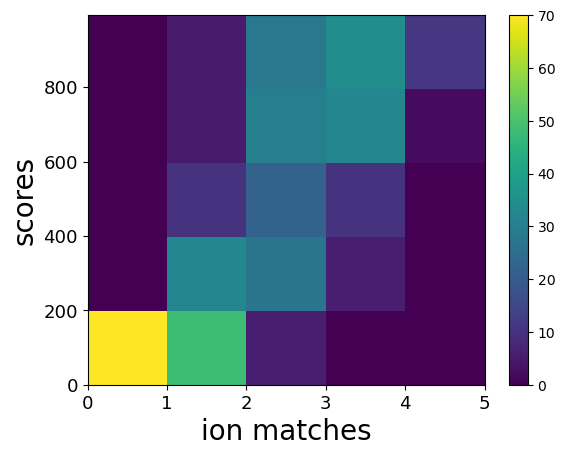

In [17]:
plt.hist2d(merged_top5['matches'], merged_top5['scores'] * 1000, bins=([0,1,2,3,4,5], 5))
plt.colorbar()
plt.clim(0, 70)

plt.xlabel('ion matches', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()
# plot name in the manuscript:
# "histograms/20240223_2d_histogram_top5.png"